# Hypothesis Testing

The purpose is to determine whether the null hypothsis is likely to be true given sample data. The null hypothesis, or initial assumption, is that the data doesn't suggest a difference.

Given the null hypothesis and an alternative process, a significance level $\alpha$ is chosen to determine when to reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.

## T-test

A statistical test to determine whether a **numeric** data sample differs significantly from the population or whether samples differ from each other.

Let's create some dummy age data for the population of voters in the entire country and a sample of voters in Minnesota and test the whether the average age of voters Minnesota differs from the population:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

## One-Sample T-Test

Checks whether sample mean differs from population mean.

In [2]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )


43.000112
39.26


In [3]:
len(minnesota_ages) / len(population_ages)

0.0002

Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. 

In [4]:
stats.ttest_1samp(a=minnesota_ages, popmean=population_ages.mean())

TtestResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678, df=49)

The test result shows the test statistic "t" is equal to -2.574. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with `stats.t.ppf()`:

In [5]:
stats.t.ppf(q=0.025,
            df=49)

-2.0095752344892093

In [6]:
stats.t.ppf(q=0.975,
            df=49)

2.009575234489209

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the `stats.t.cdf()` function:


In [7]:
stats.t.cdf(x=-2.5742, df=49) * 2 # Multiply by two for a two tailed test

0.013121066545690117

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture population mean of 43:

In [8]:
sigma = minnesota_ages.std()/math.sqrt(50)

stats.t.interval(0.95, df=49,
                 loc=minnesota_ages.mean(),
                 scale=sigma)

(36.369669080722176, 42.15033091927782)

On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [9]:
stats.t.interval(0.99,               
                 df = 49,                    
                 loc = minnesota_ages.mean(),
                 scale= sigma)               

(35.40547994092107, 43.11452005907893)

## Two-Sample T-Test

Determines whether two independent samples differ from each other

In [10]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [11]:
stats.ttest_ind(a=minnesota_ages, b=wisconsin_ages, equal_var=False)

TtestResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748, df=97.9724575497005)

The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

## Paired T-Test

Compare samples from the same group taken at different times.

In [13]:
np.random.seed(11)
before = stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before": before,
                          "weight_after": after,
                          "weight_change": after-before})

weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [14]:
stats.ttest_rel(a=before, b=after)

TtestResult(statistic=2.5720175998568284, pvalue=0.011596444318439857, df=99)

## Type I and Type II Error

Type I error, false positive, equals signicance level $\alpha$. Setting a higher confidence level reduces false positives.

Type II error, false negatives, result from setting the confidence level too high.

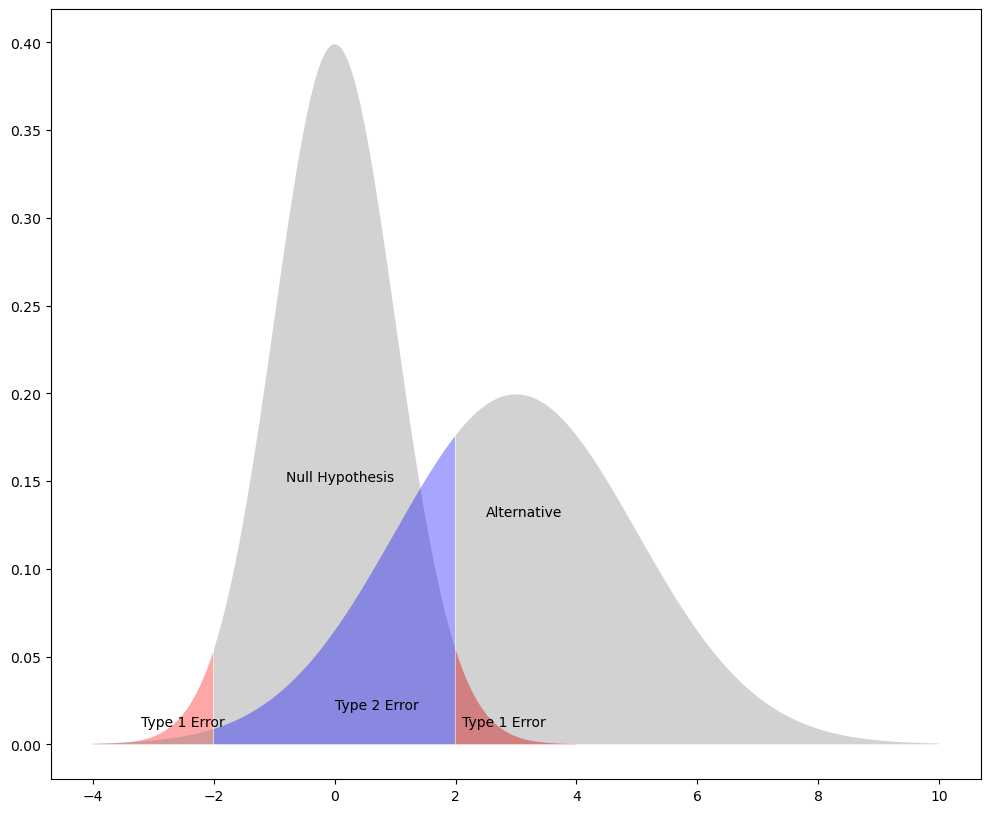

In [16]:
plt.figure(figsize=(12,10))


# Type I error left
plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

# Null Hypthesis
plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

# Type I error right
plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)


# Alternative Hypothesis left part
plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

# Type II error
plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

# Alternative Hypthesis right part
plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

We can calculate the type II error rate for the distributions above as follows:

In [17]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

With the normal distributions above, we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.


## Statistical Power

The power of a statistical test is the probability that the test rejects the null hypothesis when the alternative is actually different from the null. In other words, power is the probability that the test detects that there is something interesting going on when there actually is something interesting going on. Power is equal to one minus the type II error rate. The power of a statistical test is influenced by:

1. The significance level chosen for the test.
2. The sample size.
3. The effect size of the test.

When choosing a significance level for a test, there is a trade-off between type I and type II error. A low significance level, such as 0.01 makes a test unlikely to have type I errors (false positives), but more likely to have type II errors (false negatives) than a test with larger value of the significance level α. A common convention is that a statistical tests should have a power of at least 0.8.

A larger sample size reduces the uncertainty of the point estimate, causing the sample distribution to narrow, resulting in lower type II error rates and increased power.

Effect size is a general term that describes a numeric measure of the size of some phenomenon. There are many different effect size measurements that arise in different contexts. In the context of the T-test, a simple effect size is the difference between the means of the samples. This number can be standardized by dividing by the standard deviation of the population or the pooled standard deviation of the samples. This puts the size of the effect in terms of standard deviations, so a standardized effect size of 0.5 would be interpreted as one sample mean being 0.5 standard deviations from another (in general 0.5 is considered a "large" effect size).

Since statistical power, the significance level, the effect size and the sample size are related, it is possible to calculate any one of them for given values of the other three. This can be an important part of the process of designing a hypothesis test and analyzing results. For instance, if you want to conduct a test with a given significance level (say the standard 0.05) and power (say the standard 0.8) and you are interested in a given effect size (say 0.5 for standardized difference between sample means), you could use that information to determine how large of a sample size you need.

In python, the statsmodels library contains functions to solve for any one parameter of the power of T-tests. Use statsmodels.stats.power.tt_solve_power for one sample t-tests and statsmodels.stats.power.tt_ind_solve_power for a two sample t-test. Let's check the sample size we should use need to use given the standard parameter values above for a one sample t-test:


In [18]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size = 0.5,
               alpha = 0.05,
               power = 0.8)

33.3671314275208

In this case, we would want a sample size of at least 34 to make a study with the desired power and signifiance level capable of detecting a large effect size.